In [1]:
import numpy as np
import pandas as pd
from numpy import genfromtxt
import matplotlib.pyplot as plt


## Dataset 1

In [2]:
# Loading the dataset
data = pd.read_csv('datasets/network_backup_dataset.csv')

# creating a pandas dataframe
df = pd.DataFrame(data)

df_np = df.values

# Converting 'o' dtype to 'str'
# df['Day of Week'] = df['Day of Week'].astype('str') 


In [3]:
Week_idx = df.iloc[:, [0]]
Day = df.iloc[:, [1]]
bkp_start_time = df.iloc[:, [2]]
workflow_ID = df.iloc[:, [3]]
File_name = df.iloc[:, [4]]
bkp_size = df.iloc[:, [5]]
bkp_time = df.iloc[:, [6]]

In [4]:
#Converting all of the above columns to numpy arrays
Week_idx = np.concatenate(Week_idx.values, axis=0)
Day = np.concatenate(Day.values, axis=0)
bkp_start_time = np.concatenate(bkp_start_time.values, axis=0)
workflow_ID = np.concatenate(workflow_ID.values, axis=0)
File_name = np.concatenate(File_name.values, axis=0)
bkp_size = np.concatenate(bkp_size.values, axis=0)
bkp_time = np.concatenate(bkp_time.values, axis=0)


In [5]:
# Finding the end of 20 day period
i = 0
j = 0
while i < len(Week_idx):
    if (Week_idx[i] == 3) and (Day[i] == 'Sunday'):
        twenty_days = i - 1
        break
    i = i + 1

print("Twenty Day index: {}".format(twenty_days))

Twenty Day index: 3537


In [6]:
# Calculating number of days
i = 0
j = 1
current = Day[0]
day_idx = np.zeros(len(Week_idx))
while i < len(Week_idx):
    day_idx[i] = j
    if Day[i] != current:
        j = j + 1
        current = Day[i]
    if j == 106:
        break
    i = i + 1
        

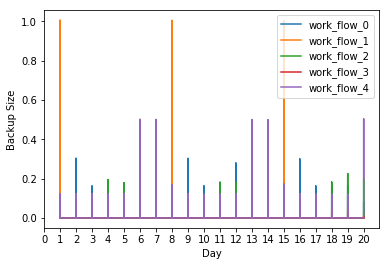

In [7]:
# Plot for 20 days

i = 0
y_idx = np.zeros(twenty_days+1)
colors = np.empty(twenty_days+1, dtype = str)
w_0 = np.zeros(twenty_days+1)
w_1 = np.zeros(twenty_days+1)
w_2 = np.zeros(twenty_days+1)
w_3 = np.zeros(twenty_days+1)
w_4 = np.zeros(twenty_days+1)
while i <= twenty_days:
    y_idx[i] = i
    if workflow_ID[i] == 'work_flow_0':
        w_0[i] = bkp_size[i]
        colors[i] = "g" 
    elif workflow_ID[i] == 'work_flow_1':
        w_1[i] = bkp_size[i]
        colors[i] = "r" 
    elif workflow_ID[i] == 'work_flow_2':
        w_2[i] = bkp_size[i]
        colors[i] = "c"
    elif workflow_ID[i] == 'work_flow_3':
        w_3[i] = bkp_size[i]
        colors[i] = "b"
    elif workflow_ID[i] == 'work_flow_4':
        w_4[i] = bkp_size[i]
        colors[i] = "k"
    i = i + 1
# plt.plot(y_idx, bkp_size[:twenty_days+1])
plt.plot(day_idx[:twenty_days+1], w_0)
plt.plot(day_idx[:twenty_days+1],w_1)
plt.plot(day_idx[:twenty_days+1],w_2)
plt.plot(day_idx[:twenty_days+1],w_3)
plt.plot(day_idx[:twenty_days+1],w_4)
plt.xticks(np.arange(21, step=1))

plt.xlabel('Day')
plt.ylabel('Backup Size')
plt.legend(['work_flow_0', 'work_flow_1', 'work_flow_2', 'work_flow_3', 'work_flow_4'])

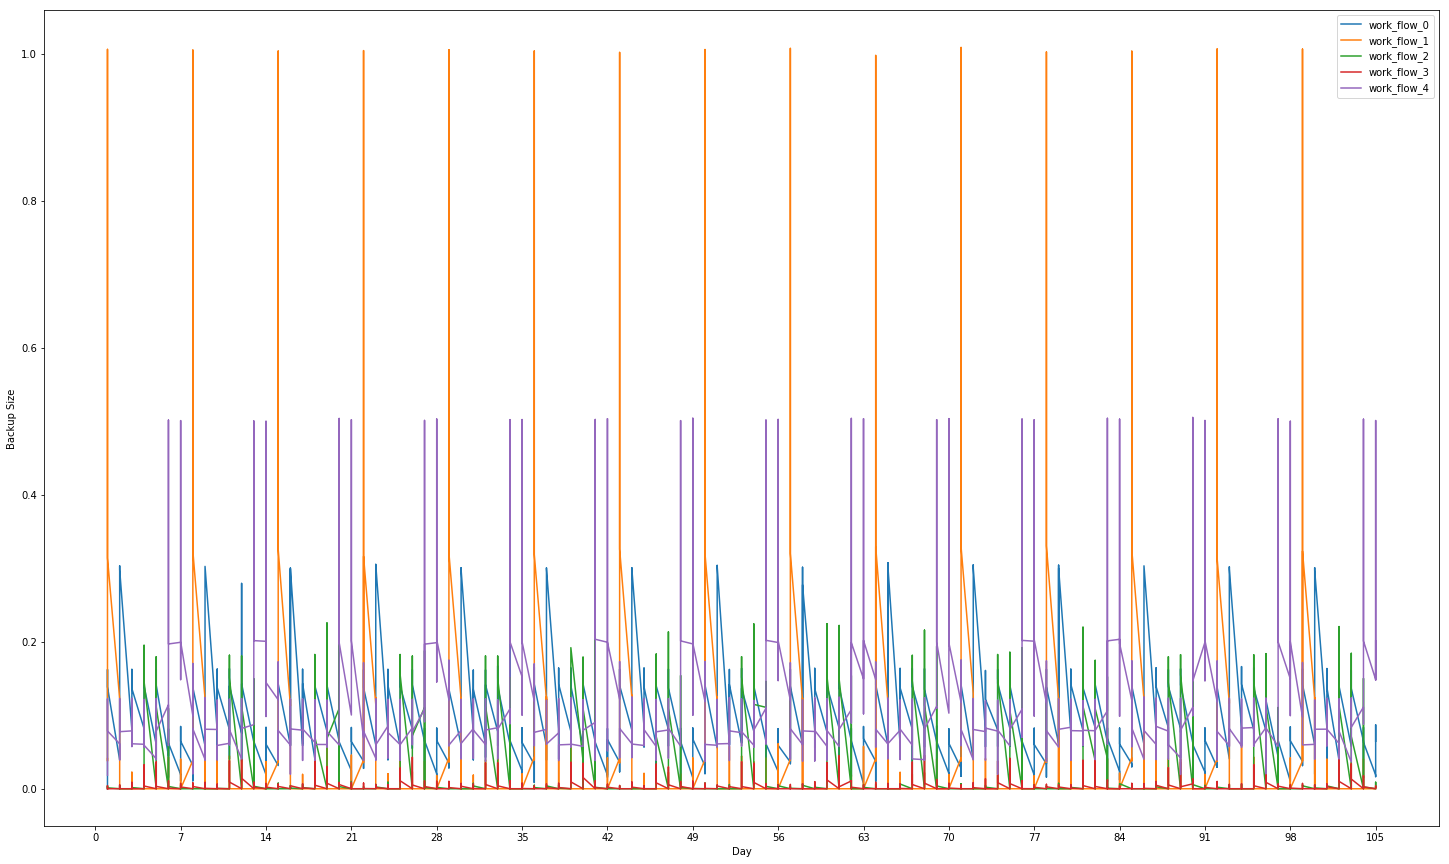

In [8]:
# Plot for 105 days

total_idx = len(Week_idx)
i = 0
y_idx = np.zeros(total_idx)
colors = np.empty(total_idx, dtype = str)
w_0 = np.empty(total_idx)
w_1 = np.empty(total_idx)
w_2 = np.empty(total_idx)
w_3 = np.empty(total_idx)
w_4 = np.empty(total_idx)
w_0[:] = np.nan
w_1[:] = np.nan
w_2[:] = np.nan
w_3[:] = np.nan
w_4[:] = np.nan
while i < total_idx:
    y_idx[i] = i
    if workflow_ID[i] == 'work_flow_0':
        w_0[i] = bkp_size[i]
        colors[i] = "g" 
    elif workflow_ID[i] == 'work_flow_1':
        w_1[i] = bkp_size[i]
        colors[i] = "r" 
    elif workflow_ID[i] == 'work_flow_2':
        w_2[i] = bkp_size[i]
        colors[i] = "c"
    elif workflow_ID[i] == 'work_flow_3':
        w_3[i] = bkp_size[i]
        colors[i] = "b"
    elif workflow_ID[i] == 'work_flow_4':
        w_4[i] = bkp_size[i]
        colors[i] = "k"
    i = i + 1
# plt.plot(y_idx, bkp_size[:total_idx])
plt.figure(figsize=(25,15))
plt.plot(day_idx[np.isfinite(w_0)], w_0[np.isfinite(w_0)])
plt.plot(day_idx[np.isfinite(w_1)], w_1[np.isfinite(w_1)])
plt.plot(day_idx[np.isfinite(w_2)], w_2[np.isfinite(w_2)])
plt.plot(day_idx[np.isfinite(w_3)], w_3[np.isfinite(w_3)])
plt.plot(day_idx[np.isfinite(w_4)], w_4[np.isfinite(w_4)])
plt.xticks(np.arange(106, step=7))
plt.xlabel('Day')
plt.ylabel('Backup Size')
plt.legend(['work_flow_0', 'work_flow_1', 'work_flow_2', 'work_flow_3', 'work_flow_4'])

## Scalar Encoding

In [9]:
# Scalar encoding

# Days
i = 0
Day_encoded = np.zeros(len(Week_idx))
while i < len(Week_idx):
    if Day[i] == 'Monday':
        Day_encoded[i] = 1
    if Day[i] == 'Tuesday':
        Day_encoded[i] = 2
    if Day[i] == 'Wednesday':
        Day_encoded[i] = 3
    if Day[i] == 'Thursday':
        Day_encoded[i] = 4
    if Day[i] == 'Friday':
        Day_encoded[i] = 5
    if Day[i] == 'Saturday':
        Day_encoded[i] = 6
    if Day[i] == 'Sunday':
        Day_encoded[i] = 7
    i = i + 1
    
# workflow_ID
i = 0
workflow_encoded = np.zeros(len(Week_idx))
while i < len(Week_idx):
    if workflow_ID[i] == 'work_flow_0':
        workflow_encoded[i] = 0
    elif workflow_ID[i] == 'work_flow_1':
        workflow_encoded[i] = 1
    elif workflow_ID[i] == 'work_flow_2':
        workflow_encoded[i] = 2
    elif workflow_ID[i] == 'work_flow_3':
        workflow_encoded[i] = 3
    elif workflow_ID[i] == 'work_flow_4':
        workflow_encoded[i] = 4
    i = i + 1

# hour of the day
hour_encoded = bkp_start_time

# week number
Week_encoded = Week_idx

# backup size
size_encoded = bkp_size

# File name
i = 0
file_name_encoded = np.zeros(len(Week_idx))
while i < len(Week_idx):
    file_name_encoded[i] = int(File_name[i][5:8])
    i = i + 1

# Combine all into 1
X_encoded = np.hstack((Day_encoded.reshape(-1,1), workflow_encoded.reshape(-1,1)))
X_encoded = np.hstack((X_encoded, hour_encoded.reshape(-1,1)))
X_encoded = np.hstack((X_encoded, Week_encoded.reshape(-1,1)))
X_encoded = np.hstack((X_encoded, file_name_encoded.reshape(-1,1)))    

# Y encoded
Y_encoded = size_encoded.reshape(-1,1)

## Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt

In [11]:
model = LinearRegression()
num_folds = 10

# randomly shuffling arrays
randomize = np.arange(len(X_encoded))
np.random.shuffle(randomize)
X_encoded = X_encoded[randomize]
Y_encoded = Y_encoded[randomize]

In [12]:
kf = KFold(n_splits=num_folds)
rmse_per_fold_train = []
rmse_per_fold_test = []
i = 0
for trainset, testset in kf.split(X_encoded):
    X_train, X_test = X_encoded[trainset], X_encoded[testset]
    y_train, y_test = Y_encoded[trainset], Y_encoded[testset]
    model.fit(X_train, y_train)
    rmse_per_fold_train.append(sqrt(mean_squared_error(y_train, model.predict(X_train))))
    rmse_per_fold_test.append(sqrt(mean_squared_error(y_test, model.predict(X_test))))
    print('RMSE Training for fold {} = {}'.format(i, sqrt(mean_squared_error(y_train, model.predict(X_train)))))
    print('RMSE Testing for fold {} = {}'.format(i, sqrt(mean_squared_error(y_test, model.predict(X_test)))))
    i = i + 1
    

RMSE Training for fold 0 = 0.10274780492365647
RMSE Testing for fold 0 = 0.11089943695507717
RMSE Training for fold 1 = 0.10494064501232112
RMSE Testing for fold 1 = 0.09058901463671948
RMSE Training for fold 2 = 0.1026434057010655
RMSE Testing for fold 2 = 0.11176763748510461
RMSE Training for fold 3 = 0.10157118178019622
RMSE Testing for fold 3 = 0.12030956065822364
RMSE Training for fold 4 = 0.10431881625004116
RMSE Testing for fold 4 = 0.09678916538723674
RMSE Training for fold 5 = 0.10421844526360075
RMSE Testing for fold 5 = 0.09776270122355624
RMSE Training for fold 6 = 0.10331744981282226
RMSE Testing for fold 6 = 0.10601310548446889
RMSE Training for fold 7 = 0.10438464033817675
RMSE Testing for fold 7 = 0.09615504197196956
RMSE Training for fold 8 = 0.1035155670773613
RMSE Testing for fold 8 = 0.10426957943282641
RMSE Training for fold 9 = 0.10417186240709922
RMSE Testing for fold 9 = 0.0982112299728305


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [13]:
print('Average RMSE Training = {}'.format(np.mean(rmse_per_fold_train)))
print('Average RMSE Testing = {}'.format(np.mean(rmse_per_fold_test)))

Average RMSE Training = 0.10358298185663409
Average RMSE Testing = 0.10327664732080133


#### Scatter Plots

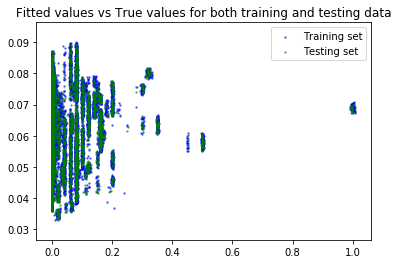

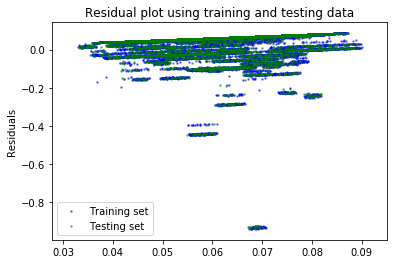

In [14]:

X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y_encoded, test_size=0.25, random_state=1)

model.fit(X_train, y_train)

pred_train = model.predict(X_train)


# Fitted values vs true values
plt.scatter(y_train, model.predict(X_train), c='b', s=2, alpha=0.5)
plt.scatter(y_test, model.predict(X_test), c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('Fitted values vs True values for both training and testing data')
# plt.ylabel('Residuals')
plt.legend(['Training set', 'Testing set'])

plt.figure()
# Residuals vs Fitted values
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c='b', s=2, alpha=0.5)
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('Residual plot using training and testing data')
plt.ylabel('Residuals')
plt.legend(['Training set', 'Testing set'])
# predicted_Y = model.predict(X_encoded)

# residual_values = np.linalg.norm(Y_encoded - model.predict(X_encoded)) ** 2

## Random Forest